# Прогнозирование оттока клиентов фитнес-клуба

**ЗАДАЧИ АНАЛИЗА**
<br>**- прогноз вероятности оттока для каждого клиента на уровне следующего месяца**
<br>**- формирование типичного портрета клиента, групп клиентов**
<br>**- анализ основных признаков влияющих на отток**
<br>**- сформировать выводы и дать рекомендации по снижению оттока**

**ОПИСАНИЕ ДАННЫХ**

***Файл данных gym_churn.csv***

<br>***'Churn'*** — факт оттока в текущем месяце;
<br>***'gender'*** — пол;
<br>***'Near_Location'*** — проживание или работа в районе, где находится фитнес-центр;
<br>***'Partner'*** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
<br>***'Promo_friends'*** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
<br>***'Phone'*** — наличие контактного телефона;
<br>***'Age'*** — возраст;
<br>***'Lifetime'*** — время с момента первого обращения в фитнес-центр (в месяцах);
<br>***'Contract_period'*** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
<br>***'Month_to_end_contract'*** — срок до окончания текущего действующего абонемента (в месяцах);
<br>***'Group_visits'*** — факт посещения групповых занятий;
<br>***'Avg_class_frequency_total'*** — средняя частота посещений в неделю за все время с начала действия абонемента;
<br>***'Avg_class_frequency_current_month'*** — средняя частота посещений в неделю за предыдущий месяц;
<br>***'Avg_additional_charges_total'*** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Описательные-статистики" data-toc-modified-id="Описательные-статистики-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Описательные статистики</a></span></li><li><span><a href="#Средние-различия-в-группах-ушедших-и-оставшихся-клиентов" data-toc-modified-id="Средние-различия-в-группах-ушедших-и-оставшихся-клиентов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Средние различия в группах ушедших и оставшихся клиентов</a></span></li><li><span><a href="#Распределение-признаков" data-toc-modified-id="Распределение-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Распределение признаков</a></span></li><li><span><a href="#Матрица-корреляции-признаков" data-toc-modified-id="Матрица-корреляции-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Матрица корреляции признаков</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок-для-обучения" data-toc-modified-id="Подготовка-выборок-для-обучения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка выборок для обучения</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Расчет-метрик-и-выбор-лучшей-модели" data-toc-modified-id="Расчет-метрик-и-выбор-лучшей-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчет метрик и выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Вывод-дендрограммы" data-toc-modified-id="Вывод-дендрограммы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод дендрограммы</a></span></li><li><span><a href="#Обучение-модели-кластеризации" data-toc-modified-id="Обучение-модели-кластеризации-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели кластеризации</a></span></li><li><span><a href="#Cредние-значения-признаков-для-кластеров" data-toc-modified-id="Cредние-значения-признаков-для-кластеров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Cредние значения признаков для кластеров</a></span></li><li><span><a href="#Распределения-признаков-для-кластеров" data-toc-modified-id="Распределения-признаков-для-кластеров-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Распределения признаков для кластеров</a></span></li><li><span><a href="#Доля-оттока-для-кластера" data-toc-modified-id="Доля-оттока-для-кластера-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Доля оттока для кластера</a></span></li></ul></li><li><span><a href="#Итоговый-вывод-и-рекомендации" data-toc-modified-id="Итоговый-вывод-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод и рекомендации</a></span></li></ul></div>

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Настройки библиотек
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)
pd.options.display.expand_frame_repr = False
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
cm = sns.light_palette("brown", as_cmap=True)

## Загрузка и предобработка данных

In [3]:
# Чтение данных
df = pd.read_csv('gym_churn.csv')

In [4]:
# Функция просмотра
def datalook (dataset):
    display(dataset.info())
    display(dataset.head())
    dataset.columns = [i.lower() for i in dataset]
    print('Количество полных дубликатов:', dataset.duplicated().sum())
    return

In [5]:
# Просмотр данных
datalook(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


Количество полных дубликатов: 0


In [6]:
df.sample()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3575,0,1,1,1,1,6,0,31,34.68,6.00,3,0.95,1.02,0


**В данных 4000 записей, пропусков нет**

## Исследовательский анализ данных

### Описательные статистики

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.00,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.00,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.00,146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,4000.00,4.32,4.19,1.00,1.00,1.00,6.00,12.00


**Из 4000 клиентов в отток попало 27%:**

<br> **- Мужчин и женщин в выборке примерно равное число. 
<br> - Средний возраст клиента 29 лет.
<br> - 85% клиентов часто находятся недалеко от фитнес-клуба.
<br> - 49% работают в одной из компаний-партнере.
<br> - 31% пришли по акции "Приведи друга".
<br> - 41% посещают групповые занятия.
<br> - В среднем клиент посещает зал 1,7 раз в неделю.**

### Средние различия в группах ушедших и оставшихся клиентов

In [8]:
# Функция подсветки
def mean_check(s):
    is_min = s == s.min()
    return ['background-color: pink' if v else '' for v in is_min]

In [9]:
# Группировка средних по статусу оттока
df.groupby('churn').agg('mean').T.style.apply(mean_check, axis = 1)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.74719,1.72856
group_visits,0.464103,0.268615
age,29.9765,26.9896
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.28309,1.66258


**Клиенты в оттоке:**

<br>**- более молодого возраста
<br>- покупают более краткосрочный абонемент
<br>- в два раза меньше посещают груповые занятия
<br>- почти на треть тратят меньше
<br>- за предыдущий месяц вдвое реже посещают зал**

### Распределение признаков

In [10]:
# Разбивка данных по признаку оттока
left_clients = df.query('churn == 1')
stayed_clients = df.query('churn == 0')

In [11]:
# Выделение категориальных признаков
cat_columns = ['gender',
               'near_location',
               'partner',
               'promo_friends',
               'phone',
               'contract_period',
               'group_visits' ]

In [12]:
# Выделение числовых признаков
data_columns = ['age',
                'avg_additional_charges_total',
                'month_to_end_contract',
                'lifetime',
                'avg_class_frequency_total',
                'avg_class_frequency_current_month']

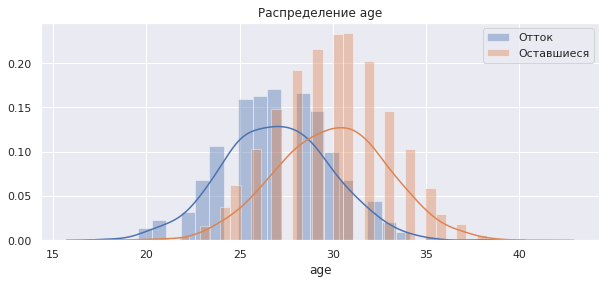

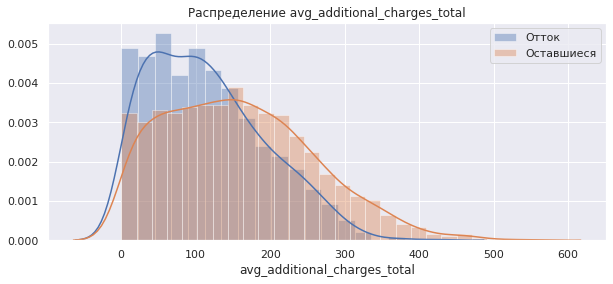

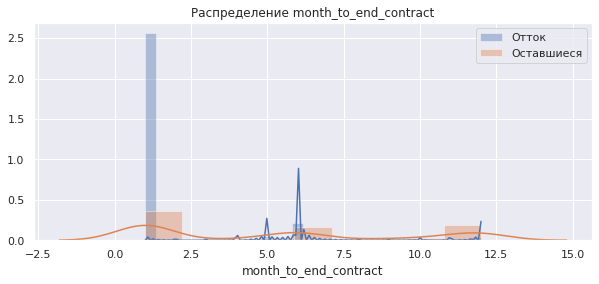

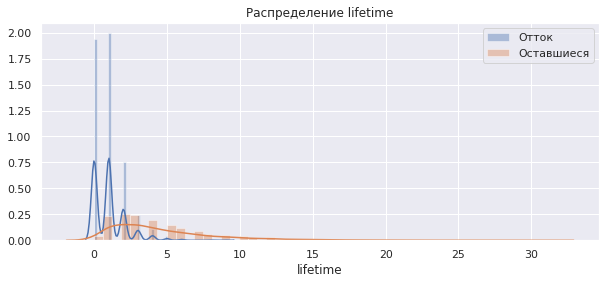

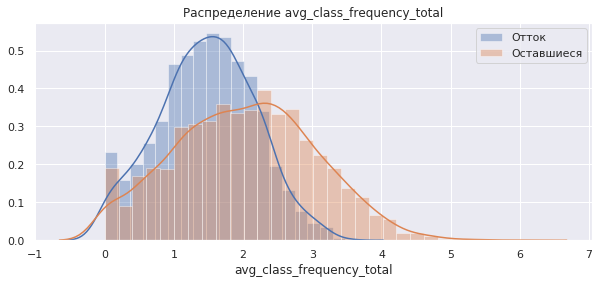

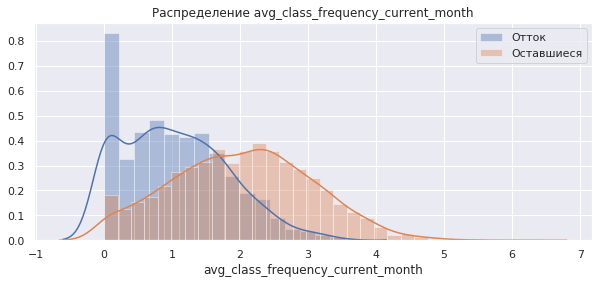

In [13]:
for column in data_columns:
    plt.figure(figsize=(10,4)) 
    plt.title(f"Распределение {column}")
    sns.distplot(left_clients[column])
    sns.distplot(stayed_clients[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

**По распределению признаков клиенты в оттоке:**

<br>**- в основном покупают месячный абонемент
<br>- новые клиенты, после пяти месяцев отток стремится к нулю
<br>- ходят один - два раза в неделю
<br>- не посещают ни одного занятия**

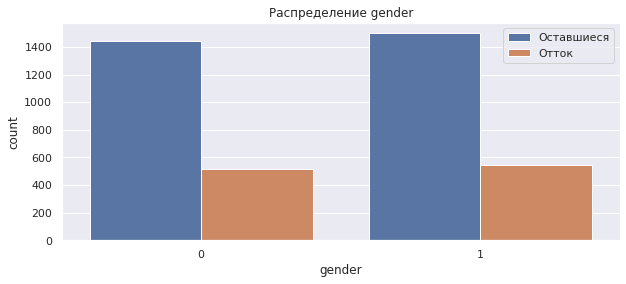

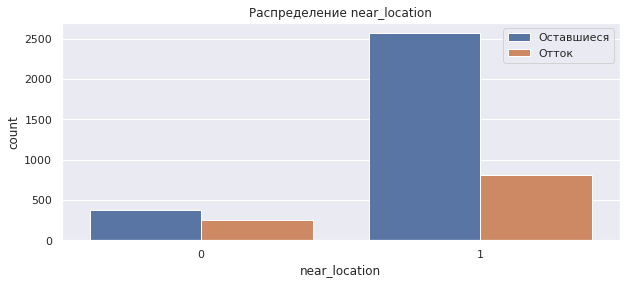

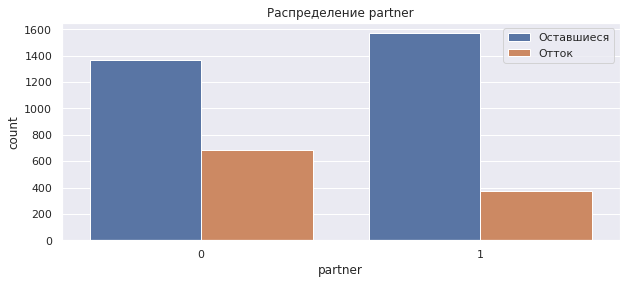

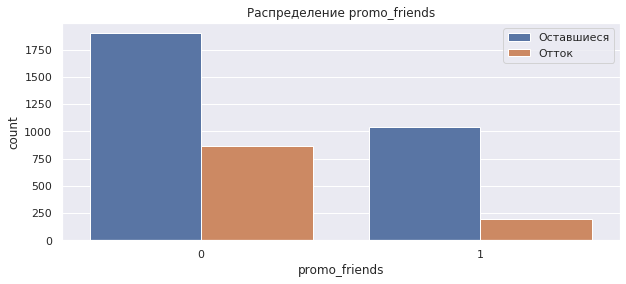

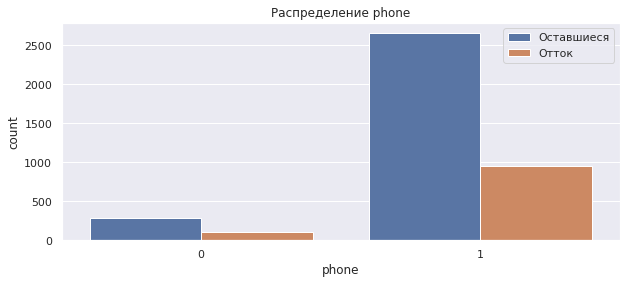

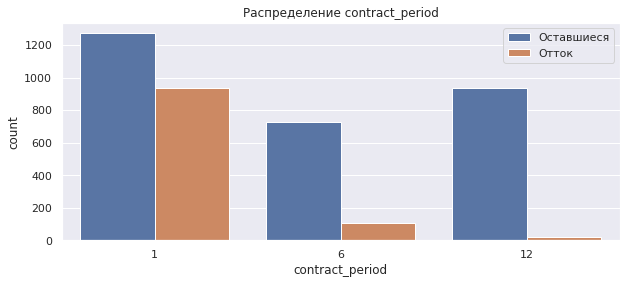

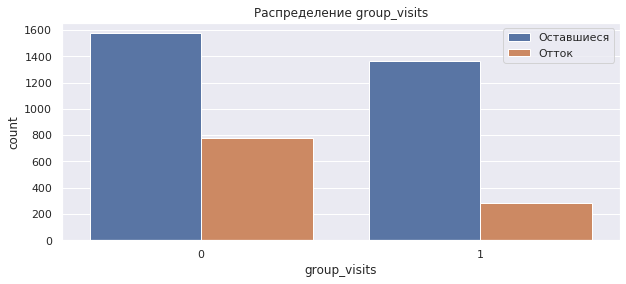

In [14]:
for column in cat_columns:
    plt.figure(figsize=(10,4)) 
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(f"Распределение {column}")
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

**После визуализации бинарных признаков показатели оттока ниже в группе клиентов, которые:**

<br>**- живут или работают недалеко от фитнес-клуба 
<br>- воспользовались по промо-акции
<br>- покупают более длительные абонементы
<br>- посещают групповые занятия.**

### Матрица корреляции признаков

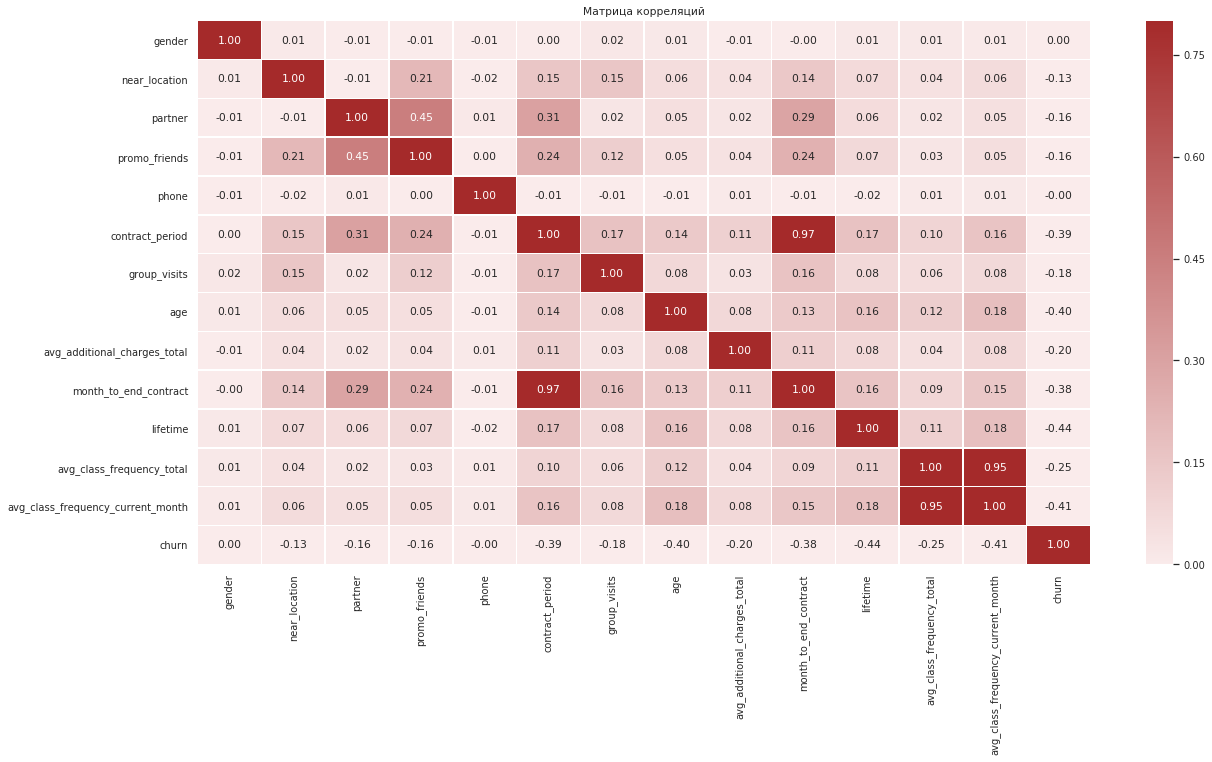

In [15]:
# Построение матрицы
sns.set(font_scale=0.9)
plt.figure(figsize=(20,10))
sns.heatmap(data = df.corr(), annot=True, fmt = '0.2f', linewidths=.5, cmap=cm, vmin=0, vmax=0.8)
plt.title('Матрица корреляций')
plt.show()    

**Сильную корреляцию имеют 2 пары признаков:**

<br>**- период абонемента и количество оставшихся месяцев до конца абонемента
<br>- среднее число посещений в неделю за последний месяц и среднее число посещений в неделю с начала действия абонемента.**

<br>**Довольно сильная взаимосвязь этих признаков логически обоснована. Практически не влияют на отток пол и наличие телефона в анкете.**

## Построение модели прогнозирования оттока клиентов

### Подготовка выборок для обучения

In [16]:
# Разделение матрицу признаков и целевую переменную
X = df.drop(['churn'], axis = 1)
y = df['churn']

In [17]:
# Разделение на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Логистическая регрессия

In [18]:
# Обучение модели логистической регрессией
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Валидация
lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

### Случайный лес

In [20]:
# Обучение модели случайный лес
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
# Валидация
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

### Расчет метрик и выбор лучшей модели

In [22]:
# Функция метрик для логистической регрессии
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [23]:
# Вывод метрик логистической регрессии
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


In [24]:
# Вывод метрик случайного леса
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


**Метрики двух примененных алгоритмов похожи, логистическая регрессия чуть впереди по всем метрикам кроме ROC_AUC, возможно оценить важность признаков по степени влияния на показатель оттока**

In [25]:
# Вывод весов признаков для логистической регрессии
lr_importance = pd.DataFrame({'feature' : X_train.columns, 'coef' : lr_model.coef_[0]})
lr_importance['coef_abs'] = lr_importance['coef'].abs()
lr_importance.sort_values(by='coef_abs', ascending=False).style.background_gradient(cmap=cm, subset=['coef_abs'])

,feature,coef,coef_abs
12,avg_class_frequency_current_month,-4.16198,4.16198
11,avg_class_frequency_total,3.47085,3.47085
10,lifetime,-0.972874,0.972874
6,group_visits,-0.712743,0.712743
4,phone,0.611301,0.611301
3,promo_friends,-0.568434,0.568434
5,contract_period,-0.188969,0.188969
7,age,-0.181963,0.181963
9,month_to_end_contract,-0.0669398,0.0669398
1,near_location,0.0529758,0.0529758


In [26]:
# Вывод весов для случайного леса
rf_importance = pd.DataFrame({'feature' : X_train.columns, 'importance' : rf_model.feature_importances_})
rf_importance.sort_values(by='importance', ascending=False).style.background_gradient(cmap=cm)

,feature,importance
10,lifetime,0.276499
12,avg_class_frequency_current_month,0.18017
11,avg_class_frequency_total,0.129883
7,age,0.119129
8,avg_additional_charges_total,0.0914729
9,month_to_end_contract,0.068855
5,contract_period,0.0659637
6,group_visits,0.0156516
0,gender,0.0124253
2,partner,0.0122845


**Многие значения коэфицентов логистической регрессии отрицательные что показывают обратно пропорциональную взаимосвязь, т.е. чем ниже клиент посещает зал в последний месяц, групповые занятия, приходит по промо тем выше у него вероятность оттока. Также повышает вероятность ухода клиента более короткий Lifetime, время с первого визита. Пол, траты, близость локации и время до окончания абонемента имеют малую важность для целевого признака.**

## Кластеризация клиентов

### Стандартизация данных

In [27]:
# Стандартизация
sc = StandardScaler()
x_sc = sc.fit_transform(X)

### Вывод дендрограммы

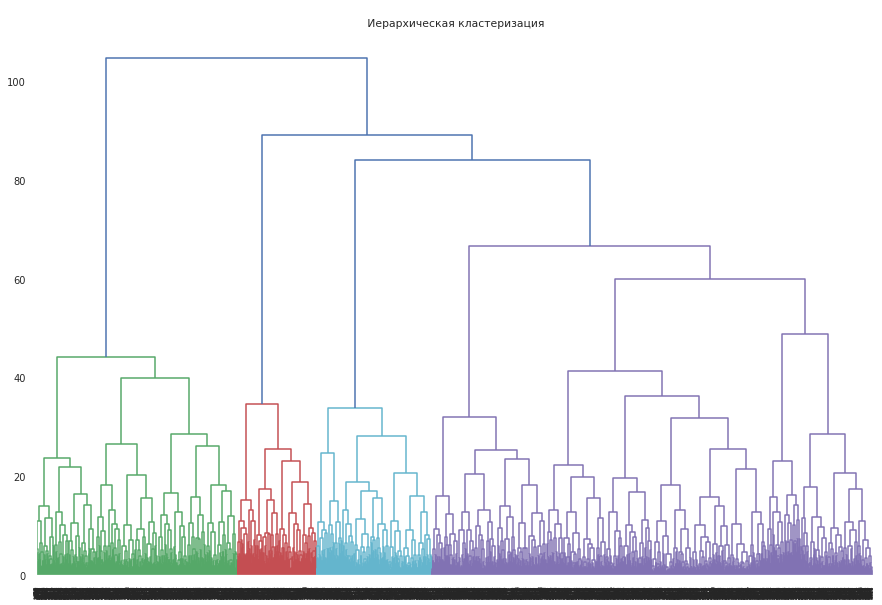

In [28]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация')
plt.show()

### Обучение модели кластеризации

In [29]:
# Число кластеров
km = KMeans(n_clusters = 5, random_state=0)

In [30]:
# Применение алгоритма и формирование вектора кластеров
labels = km.fit_predict(x_sc)
df['cluster_km'] = labels

### Cредние значения признаков для кластеров

In [31]:
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.88,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.71,143.96,135.46,131.62,161.72
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


<br>**Самая высокая доля оттока у 3-го кластера - 51%, у 1-го и 2-го кластеров - 27% и 44% соотвественно, минимальные значения у 4-го и 0-го кластеров - 7% и 3%.**

<br>**Однако можно заметить что у двух кластеров с высоким оттоком, 2-го и 3-го, немного разные показатели в близости локации и групповых визитах. Вероятнее уйдут клиенты с контрактом заканчивающимся менее чем через 2.5 месяца, посетившие в среднем одно занятие в прошедшем месяце. Интересно что у клиентов 4-го кластера с низкой вероятностью оттока средний контракт меньше чем у клиентов 2-го кластера с вчетверо большей вероятностью оттока.**

### Распределения признаков для кластеров

In [32]:
df_cluster = df.copy()

In [33]:
non_binary_col = df_cluster.drop(columns =(['gender', 
                                'near_location',
                                'partner',
                                'promo_friends',
                                'phone',
                                'group_visits',
                                'churn',
                                'cluster_km',
                                'contract_period',
                                'month_to_end_contract',
                                'lifetime']))
binary_col = df_cluster[['gender',
                 'near_location', 
                 'partner','promo_friends',
                 'phone',
                 'group_visits',
                 'contract_period',
                 'month_to_end_contract',
                 'lifetime']]

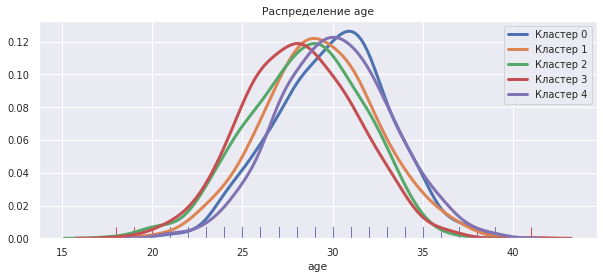

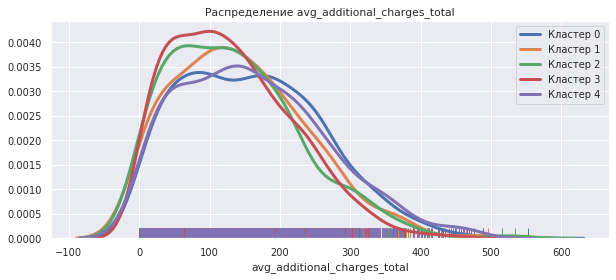

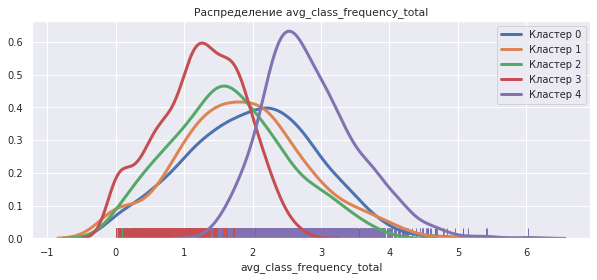

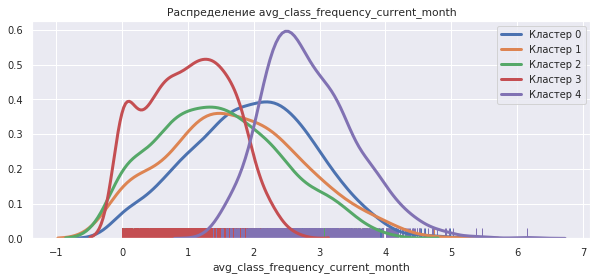

In [34]:
for col in non_binary_col:
    plt.figure(figsize=(10,4)) 
    for i in range(0,5):
        plt.title(f"Распределение {col}")
        sns.distplot(df_cluster.query('cluster_km == @i')[col],
                    hist=False,
                    rug=True,
                    kde_kws={'label':'Кластер'+' '+str(i), 'lw': 3})
plt.show()

<br>**По графику возраста больше всего склонны к оттоку достаточно молодые клиенты, большей частью 28 лет - в 3 кластере, в менее подверженных оттоку кластерах возраст на пике - 30 и 32 года.**

<br>**Меньше всего тратит 3 кластер с самой большой вероятностью оттока, дополнительные траты - важный показатель вероятности оттока.**

<br>**Разница в противоположных по оттоку кластерах - около 2 посещений в неделю, что подтверждает факт - если клиент пришел 2 раза и более в неделю, вероятнее всего он продолжит пользоватся услугами заведения.**

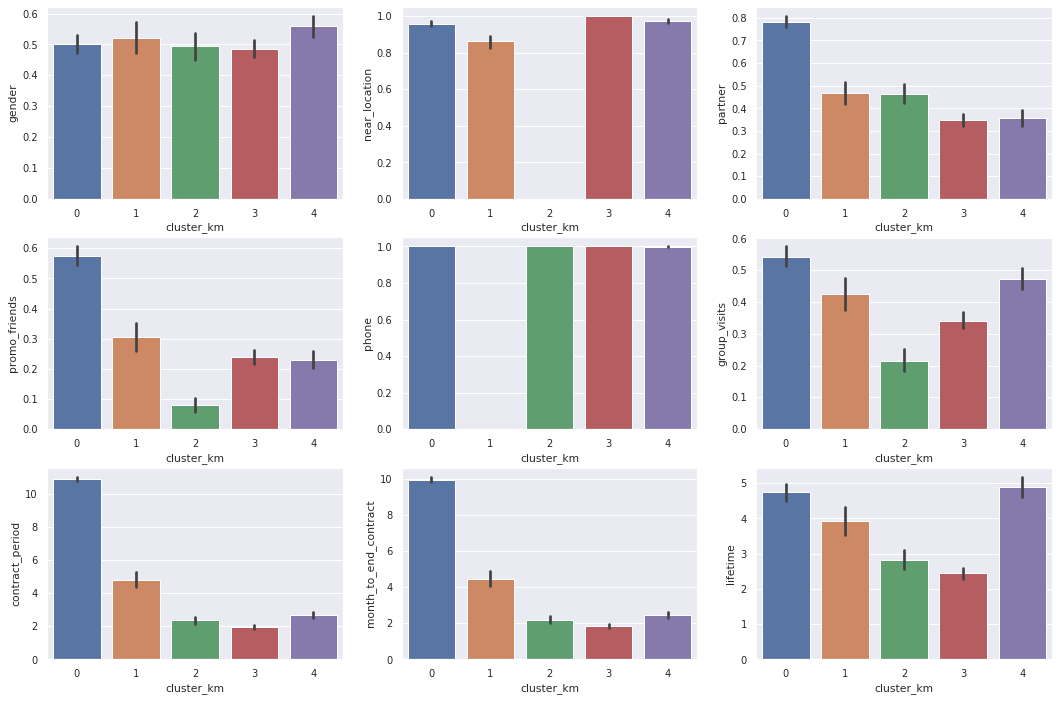

In [35]:
plt.figure(figsize=(18,12))
for i in range(len(binary_col.columns)):
    plt.subplot(3,3,i+1)
    x = df_cluster['cluster_km']
    y = binary_col.iloc[:,i]
    sns.barplot(x=x, y=y)
plt.show()

**Партнерская программа и промо важны для одного надежного кластера, но гораздо менее важны для другого надежного кластера, можно сделать вывод что не одни скидки и бонусы удерживают людей.
<br>Групповые визиты ожидаемо ниже у склонных к оттоку кластеров.
Высока вероятность оттока у клиентов 2 и 3 кластера, когда остаеться 2 месяца до окончания абонемента.
Срок жизни у 0-го надежного кластера высок в сочетании с партнерской программой и промо и низок у другого не склонного к отттоку <br>4 кластера. Клиенты 0 кластера в основном с годичными абонементами, клиенты 4 кластера - с трехмесячными. Промо и партнерка побуждает клиентов покупать более длинные абонементы и оставаться с большой вероятностью.
<br>Клиенты 2 кластера очевидно не живут или работают рядом, но приходят по партнерской программе.
<br>Клиенты 1 кластера не оставили ни одного телефона - возможно им нужна и удобна другая коммуникация.**

### Доля оттока для кластера

In [36]:
df.groupby('cluster_km').agg({'churn':'mean'}).style.background_gradient(cmap=cm)

,churn
cluster_km,
0,0.0276954
1,0.267532
2,0.443564
3,0.514263
4,0.0681004


## Итоговый вывод и рекомендации

<br>**Вероятнее всего перестают посещать занятия клиенты около 28 лет, как мужчины так и женщины, до 30 лет - вероятная группа риска. Для аудитории до 30, необходимы отдельные стимулы.**

<br>**Самый рискованный период посещений - между первым и вторым занятием, первый месяц абонемента, необходимо стремиться получать или стимулировать клиентов предоставлять обратную связь после первого посещения, а также от тех кто посещает заведение первый месяц не чаще 1 раза в неделю. Customer feedback очень важен так как клиенты двух самых проблемных кластеров в основном берут двухмесячные абонементы и могут перестать ходить буквально сразу после 1 - 2 занятий. Возможна практика бесплатного первого занятия или мотивирующий кэшбэк.** 

<br>**Очевидно что партнерская программа вместе с промо и посещением групповых занятий дает кумулятивный эффект в увеличении срока абонемента, что очень сильно снижает вероятность ухода клиента. Необходима дальнейшая работа в этом направлении, расширение программ, регулярные промо, основные метрики - срок абонемента и срок жизни клиента более 5 месяцев. 1 и 2 кластеры имеют возможные точки роста в этом направлении. Стимулирующая мотивация нужна начиная с 2 месяца абониемента/жизни клиента.**

<br>**Так же есть кластер клиентов с высокой лояльностью, но с коротким сроком абонемента одновременно с большим сроком жизни, которые тем не менее приходят вне партнерской программы и скидок. Возможно нужно пристальнее изучить эту группу клиентов. Они старше, меньше ориентируются на скидки и партнерку, однако регулярно продляют абонимент, очевидно у них не ценовая мотивация. Изучение этой группы позволит найти точки роста для 2 и 3 кластера - кластеров с высоким риском оттока. Хорошим способом может стать проведение своеобразного Customer panel для групп клиентов, для получения обратной связи и понимания запросов и мотивации.**